1. Establish a MySQL Connection

In [18]:

# Import necessary libraries
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt

# Function to establish connection to MySQL database
def connect_to_db():
    try:
        connection = mysql.connector.connect(
            host='localhost',  # Replace with your host
            user='root',  # Replace with your MySQL username
            password='Toor',  # Replace with your MySQL password
            database='TMA_data'  # Replace with your database name
        )
        if connection.is_connected():
            print("Connected to MySQL Server")
        return connection
    except Error as e:
        print(f"Error: {e}")
        return None


2. Check and Optimize Data Types

In [19]:
# Function to check current data types in the recruitment_data table
def check_data_types():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        cursor.execute("SHOW COLUMNS FROM recruitment_data;")
        columns = cursor.fetchall()
        print("Current Data Types in recruitment_data Table:")
        for column in columns:
            print(column)
        connection.close()

# Check data types for optimization
check_data_types()


# Function to optimize data types using ALTER TABLE
def optimize_data_types():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        # Example of optimizing Offers_Made_Firm1 by reducing to SMALLINT
        alter_queries = [
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Made_Firm1 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Made_Firm2 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Made_Firm3 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Total_Offers_Made SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Accepted_Firm1 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Accepted_Firm2 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Offers_Accepted_Firm3 SMALLINT;",
            "ALTER TABLE recruitment_data MODIFY COLUMN Total_Offers_Accepted SMALLINT;"
        ]

        for query in alter_queries:
            cursor.execute(query)

        connection.commit()
        print("Data types optimized.")
        connection.close()

# Run the optimization
optimize_data_types()


Connected to MySQL Server
Current Data Types in recruitment_data Table:
('Location', 'varchar(50)', 'YES', '', None, '')
('Department', 'varchar(50)', 'YES', '', None, '')
('Headcount_Available', 'smallint', 'YES', '', None, '')
('Offers_Made_Firm1', 'smallint', 'YES', '', None, '')
('Offers_Made_Firm2', 'smallint', 'YES', '', None, '')
('Offers_Made_Firm3', 'smallint', 'YES', '', None, '')
('Total_Offers_Made', 'smallint', 'YES', '', None, '')
('Offers_Accepted_Firm1', 'smallint', 'YES', '', None, '')
('Offers_Accepted_Firm2', 'smallint', 'YES', '', None, '')
('Offers_Accepted_Firm3', 'smallint', 'YES', '', None, '')
('Total_Offers_Accepted', 'smallint', 'YES', '', None, '')
Connected to MySQL Server
Data types optimized.


3. Recompute Totals

In [20]:
# Function to recompute totals for offers made and accepted
def recompute_totals():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        # Recompute the totals for offers made and accepted
        cursor.execute(
            "UPDATE recruitment_data "
            "SET Total_Offers_Made = Offers_Made_Firm1 + Offers_Made_Firm2 + Offers_Made_Firm3, "
            "Total_Offers_Accepted = Offers_Accepted_Firm1 + Offers_Accepted_Firm2 + Offers_Accepted_Firm3;"
        )
        connection.commit()
        print("Totals recomputed successfully.")
        connection.close()

# Recompute totals
recompute_totals()


Connected to MySQL Server
Totals recomputed successfully.


4. Create fig1 Table

In [21]:
# Function to create the fig1 table in MySQL
def create_fig1_table():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        # Drop the fig1 table if it exists and recreate it
        cursor.execute("DROP TABLE IF EXISTS fig1;")
        cursor.execute(
            "CREATE TABLE fig1 AS "
            "SELECT Location, Department, SUM(Headcount_Available) AS Headcount_Available, "
            "SUM(Offers_Made_Firm1 + Offers_Made_Firm2 + Offers_Made_Firm3) AS Total_Offers_Made, "
            "SUM(Offers_Accepted_Firm1 + Offers_Accepted_Firm2 + Offers_Accepted_Firm3) AS Total_Offers_Accepted "
            "FROM recruitment_data GROUP BY Location, Department;"
        )
        connection.commit()
        print("Table fig1 created successfully.")
        connection.close()

# Create the fig1 table
create_fig1_table()


Connected to MySQL Server
Table fig1 created successfully.


5. Create easy_data Table

In [22]:
# Function to create the easy_data table for further analysis and visualization
def create_easy_data_table():
    connection = connect_to_db()
    if connection:
        cursor = connection.cursor()
        cursor.execute("DROP TABLE IF EXISTS easy_data;")
        cursor.execute(
            "CREATE TABLE easy_data AS "
            "SELECT Location, Department, Headcount_Available AS Total_Headcount, "
            "Offers_Made_Firm1 AS Offers_Made_Company1, Offers_Made_Firm2 AS Offers_Made_Company2, Offers_Made_Firm3 AS Offers_Made_Company3, "
            "Total_Offers_Made AS Total_Offers, "
            "Offers_Accepted_Firm1 AS Offers_Accepted_Company1, Offers_Accepted_Firm2 AS Offers_Accepted_Company2, Offers_Accepted_Firm3 AS Offers_Accepted_Company3, "
            "Total_Offers_Accepted AS Total_Accepted_Offers "
            "FROM recruitment_data;"
        )
        connection.commit()
        print("Table easy_data created successfully.")
        connection.close()

# Create the easy_data table
create_easy_data_table()


Connected to MySQL Server
Table easy_data created successfully.


6. Display Table for Visualization

Connected to MySQL Server
MySQL connection is closed


C:\Users\gourob\AppData\Local\Temp\ipykernel_14936\3004729062.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)  # Fetch data into a Pandas DataFrame


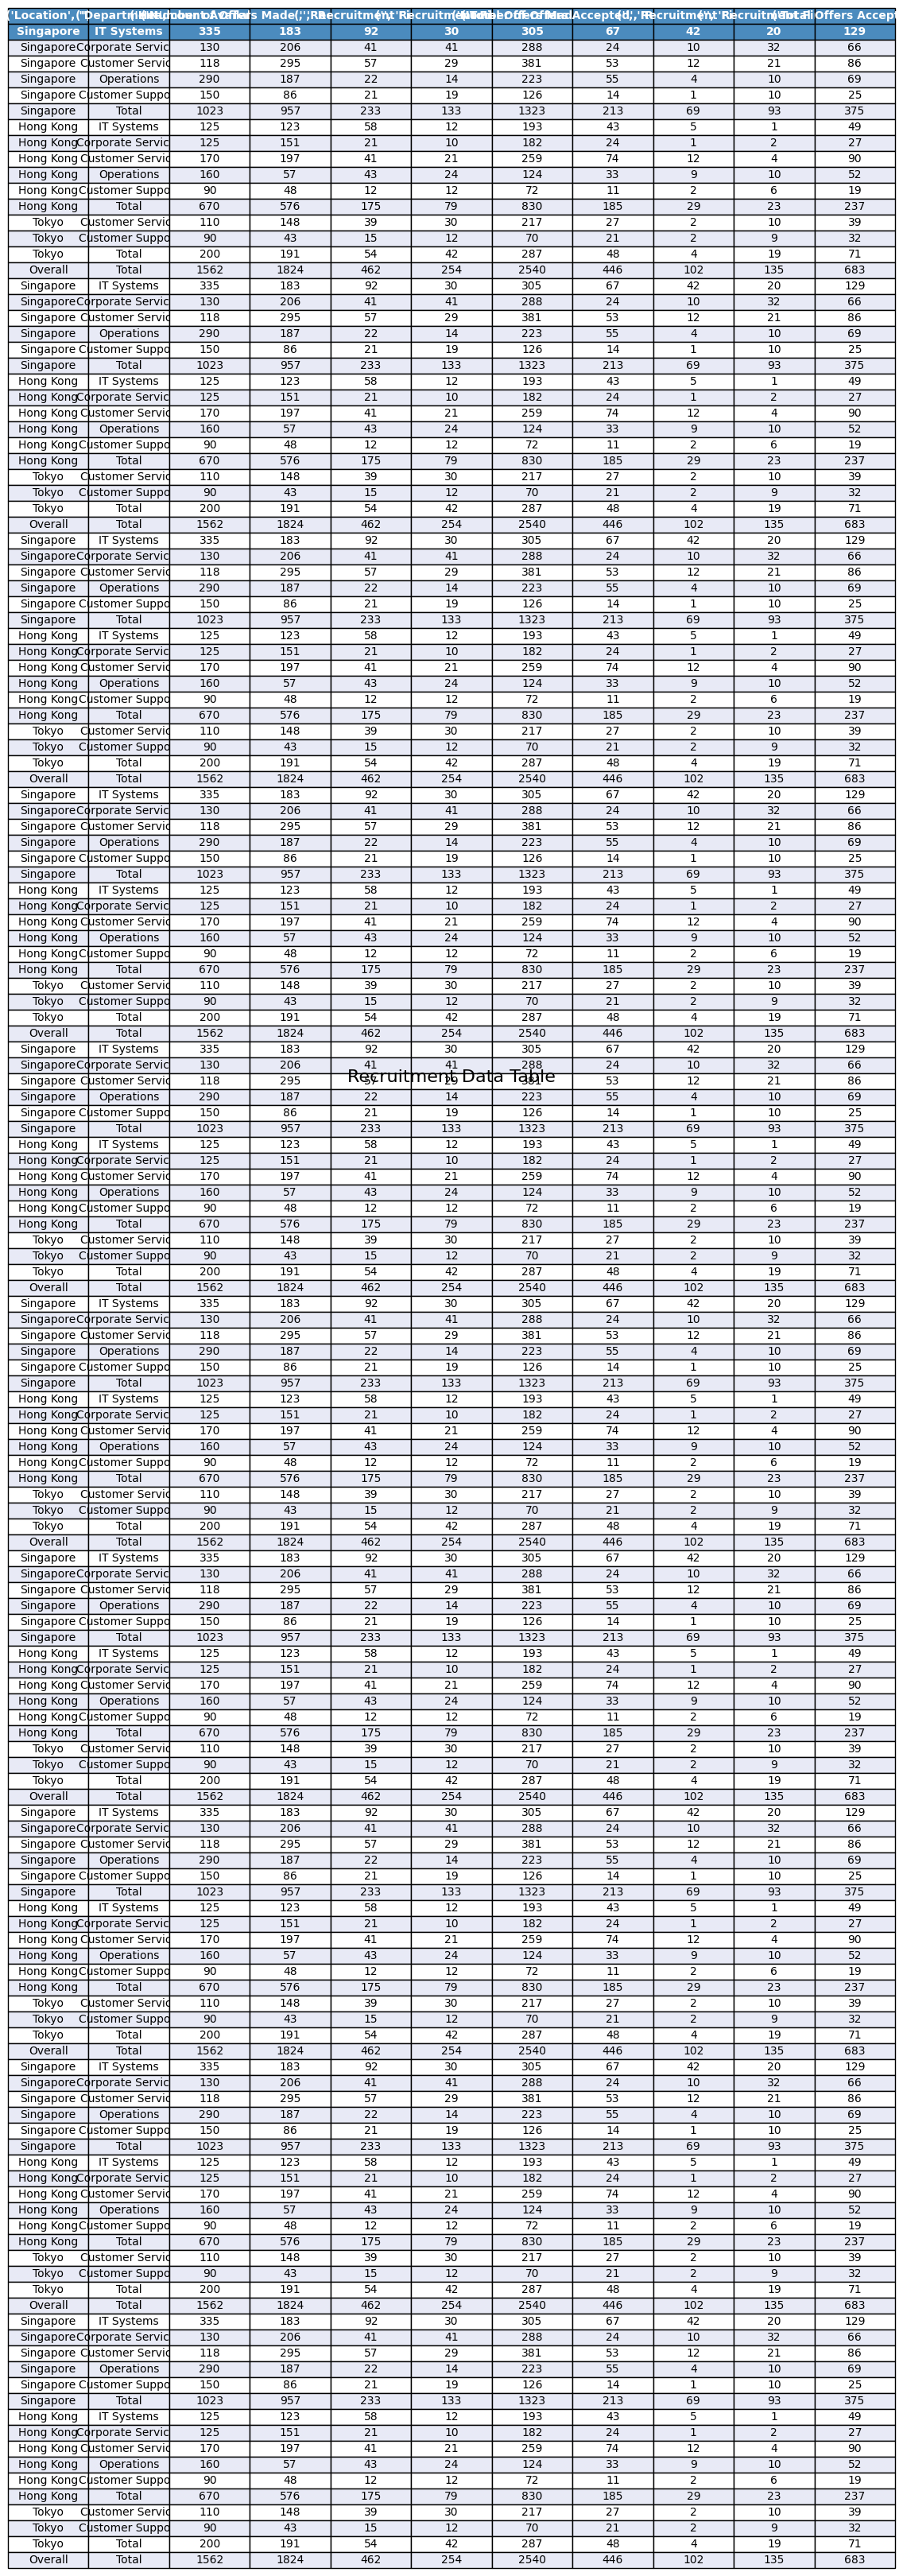

In [23]:
# Function to fetch data from easy_data table and return as a DataFrame
def fetch_data():
    connection = connect_to_db()
    if connection:
        try:
            query = "SELECT * FROM easy_data;"
            df = pd.read_sql(query, connection)  # Fetch data into a Pandas DataFrame
            return df
        except Error as e:
            print(f"Error fetching data: {e}")
        finally:
            if connection.is_connected():
                connection.close()
                print("MySQL connection is closed")

# Fetch data from the easy_data table
df = fetch_data()


# Function to display the table similar to your uploaded image using Matplotlib
def display_custom_table(df):
    fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size according to the table

    # Adjusted custom column headers to match the number of columns in df (11 columns)
    headers = [
        ['Location', 'Department', 'Headcount Available', 'Number of Offers Made', '', '', 'Total Offers Made', 'Number of Offers Accepted', '', '', 'Total Offers Accepted'],
        ['', '', '', 'Recruitment Firm 1', 'Recruitment Firm 2', 'Recruitment Firm 3', '', 'Recruitment Firm 1', 'Recruitment Firm 2', 'Recruitment Firm 3', '']
    ]

    # Ensure the number of columns in df matches the number of headers
    df.columns = pd.MultiIndex.from_tuples(zip(*headers))

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    # Display the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Adjust font size and scale to fit content
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Color customization for specific rows/columns, replicating your table style
    for (i, j), cell in table.get_celld().items():
        if i == 0 or i == 1:  # First and second header rows
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#4B8BBE')  # Blue Header Background for the top row
        elif i % 2 == 0:
            cell.set_facecolor('#E8EAF6')  # Light blue for alternating rows
        else:
            cell.set_facecolor('white')  # White for other rows

    plt.title('Recruitment Data Table', fontsize=16, pad=20)
    plt.show()

# Display the fetched data in a graphical table format
if df is not None:
    display_custom_table(df)
